## IRMCI Stock Analysis Practice

### In this exercise, we had to predict whether the stock price would go up or down tomorrow by adding various arbitrary indicators. This was done by adding a 'trend' column and using various forecasting models. I have used the backward elimination technique to solve this exercise.

### Solved by Ghazale Ramezani

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from persiantools.jdatetime import JalaliDate
import jalali_pandas
import pandas_ta  as ta
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [2]:
df = pd.read_csv(r'RMCI.csv', encoding='utf-8')
df.head()

,ticker,miladi,open,high,low,close,volume,value,transaction_count,lastday_price,shamsi
0,همراه,20130820,42000.0,42200.0,42000.0,42001.0,546520,2.295462e+10,69,1000.0,13920529
1,همراه,20130821,42009.0,43500.0,42005.0,42142.0,161499,6.929039e+09,214,42001.0,13920530
2,همراه,20130824,43300.0,43300.0,42222.0,42191.0,110913,4.724576e+09,168,42142.0,13920602
3,همراه,20130825,42860.0,42860.0,42453.0,42213.0,67490,2.869908e+09,94,42191.0,13920603
4,همراه,20130826,42401.0,42501.0,42036.0,42214.0,160307,6.768045e+09,121,42213.0,13920604


In [3]:
df['Gregorian_Date'] = pd.to_datetime(df['miladi'], format='%Y%m%d')
df["Jalali_Date"] = df["Gregorian_Date"].jalali.to_jalali()
df['year'] = df["Jalali_Date"].jalali.year
df['month'] = df["Jalali_Date"].jalali.month
df['day'] = df["Jalali_Date"].jalali.day
df['weekday'] = df["Jalali_Date"].jalali.weekday
df.drop(['ticker','shamsi','miladi'],axis=1,inplace=True)

In [4]:
df

,open,high,low,close,volume,value,transaction_count,lastday_price,Gregorian_Date,Jalali_Date,year,month,day,weekday
0,42000.0,42200.0,42000.0,42001.0,546520,2.295462e+10,69,1000.0,2013-08-20,1392-05-29 00:00:00,1392,5,29,3
1,42009.0,43500.0,42005.0,42142.0,161499,6.929039e+09,214,42001.0,2013-08-21,1392-05-30 00:00:00,1392,5,30,4
2,43300.0,43300.0,42222.0,42191.0,110913,4.724576e+09,168,42142.0,2013-08-24,1392-06-02 00:00:00,1392,6,2,0
3,42860.0,42860.0,42453.0,42213.0,67490,2.869908e+09,94,42191.0,2013-08-25,1392-06-03 00:00:00,1392,6,3,1
4,42401.0,42501.0,42036.0,42214.0,160307,6.768045e+09,121,42213.0,2013-08-26,1392-06-04 00:00:00,1392,6,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2730,4640.0,4659.0,4482.0,4527.0,11027218,4.978342e+10,611,4536.0,2024-12-10,1403-09-20 00:00:00,1403,9,20,3
2731,4526.0,4650.0,4476.0,4536.0,9501665,4.326700e+10,529,4527.0,2024-12-11,1403-09-21 00:00:00,1403,9,21,4
2732,4672.0,4672.0,4670.0,4596.0,11756783,5.492769e+10,310,4536.0,2024-12-14,1403-09-24 00:00:00,1403,9,24,0
2733,4733.0,4733.0,4608.0,4657.0,39000016,1.816105e+11,937,4596.0,2024-12-15,1403-09-25 00:00:00,1403,9,25,1


In [5]:
df['ema_5'] = df.ta.ema(5)
df['ema_10'] = df.ta.ema(10)
df['ema_20'] = df.ta.ema(20)
df['ema_40'] = df.ta.ema(40)
df['ema_60'] = df.ta.ema(60)

df['sma_5'] = df.ta.sma(5)
df['sma_10'] = df.ta.sma(10)
df['sma_20'] = df.ta.sma(20)
df['sma_40'] = df.ta.sma(40)
df['sma_60'] = df.ta.sma(60)

df['trima_5'] = df.ta.trima(5)
df['trima_10'] = df.ta.trima(10)
df['trima_20'] = df.ta.trima(20)
df['trima_40'] = df.ta.trima(40)
df['trima_60'] = df.ta.trima(60)

df['rsi_5'] = df.ta.rsi(5)
df['rsi_10'] = df.ta.rsi(10)
df['rsi_20'] = df.ta.rsi(20)
df['rsi_40'] = df.ta.rsi(40)
df['rsi_60'] = df.ta.rsi(60)


In [6]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'value', 'transaction_count',
       'lastday_price', 'Gregorian_Date', 'Jalali_Date', 'year', 'month',
       'day', 'weekday', 'ema_5', 'ema_10', 'ema_20', 'ema_40', 'ema_60',
       'sma_5', 'sma_10', 'sma_20', 'sma_40', 'sma_60', 'trima_5', 'trima_10',
       'trima_20', 'trima_40', 'trima_60', 'rsi_5', 'rsi_10', 'rsi_20',
       'rsi_40', 'rsi_60'],
      dtype='object')

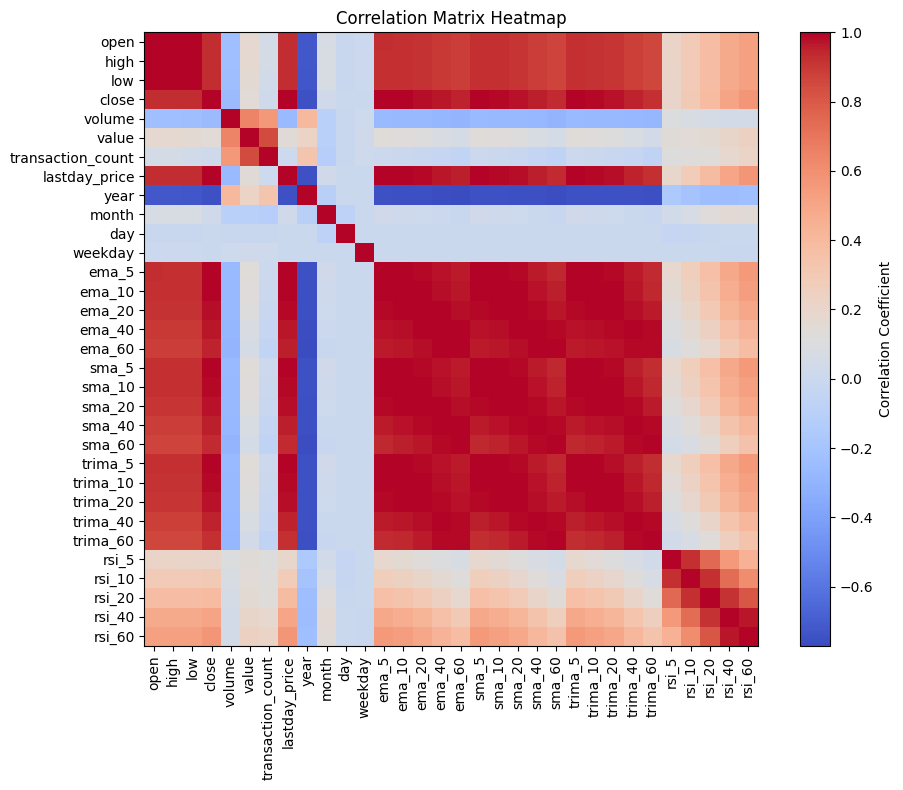

In [7]:
df0 = df.drop(columns=['Gregorian_Date', 'Jalali_Date'])

correlation_matrix = df0.corr()

plt.figure(figsize=(10,8))

plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')

plt.colorbar(label="Correlation Coefficient")

plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

plt.title("Correlation Matrix Heatmap")

plt.tight_layout()
plt.show()

In [8]:
df['trend'] = df.apply(lambda row: 1 if row['close'] > row['lastday_price'] else 0 , axis = 1)

In [9]:
df

,open,high,low,close,volume,value,transaction_count,lastday_price,Gregorian_Date,Jalali_Date,...,trima_10,trima_20,trima_40,trima_60,rsi_5,rsi_10,rsi_20,rsi_40,rsi_60,trend
0,42000.0,42200.0,42000.0,42001.0,546520,2.295462e+10,69,1000.0,2013-08-20,1392-05-29 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,42009.0,43500.0,42005.0,42142.0,161499,6.929039e+09,214,42001.0,2013-08-21,1392-05-30 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,43300.0,43300.0,42222.0,42191.0,110913,4.724576e+09,168,42142.0,2013-08-24,1392-06-02 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,42860.0,42860.0,42453.0,42213.0,67490,2.869908e+09,94,42191.0,2013-08-25,1392-06-03 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,42401.0,42501.0,42036.0,42214.0,160307,6.768045e+09,121,42213.0,2013-08-26,1392-06-04 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2730,4640.0,4659.0,4482.0,4527.0,11027218,4.978342e+10,611,4536.0,2024-12-10,1403-09-20 00:00:00,...,4342.277778,4222.52,3894.895,3801.731111,89.884653,90.695318,87.157917,77.139016,68.198606,0
2731,4526.0,4650.0,4476.0,4536.0,9501665,4.326700e+10,529,4527.0,2024-12-11,1403-09-21 00:00:00,...,4371.333333,4254.62,3922.065,3811.133333,90.361522,90.921376,87.338653,77.329220,68.381318,1
2732,4672.0,4672.0,4670.0,4596.0,11756783,5.492769e+10,310,4536.0,2024-12-14,1403-09-24 00:00:00,...,4403.250000,4285.70,3950.880,3821.636667,93.080077,92.306017,88.476731,78.549516,69.566749,1
2733,4733.0,4733.0,4608.0,4657.0,39000016,1.816105e+11,937,4596.0,2024-12-15,1403-09-25 00:00:00,...,4441.138889,4317.71,3980.910,3833.355556,94.905984,93.436776,89.487927,79.689486,70.702395,1


In [10]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume', 'value', 'transaction_count',
       'lastday_price', 'Gregorian_Date', 'Jalali_Date', 'year', 'month',
       'day', 'weekday', 'ema_5', 'ema_10', 'ema_20', 'ema_40', 'ema_60',
       'sma_5', 'sma_10', 'sma_20', 'sma_40', 'sma_60', 'trima_5', 'trima_10',
       'trima_20', 'trima_40', 'trima_60', 'rsi_5', 'rsi_10', 'rsi_20',
       'rsi_40', 'rsi_60', 'trend'],
      dtype='object')

In [11]:
index = df.columns.get_loc('weekday')
df = df.iloc[:,index+1:]

In [12]:
df.columns
print(len(df.columns))

21


In [13]:
print(df.isnull().any(axis=1).sum())

60


In [14]:
df_indicators = df.dropna().reset_index(drop=True)

In [15]:
print(df_indicators.isnull().any(axis=1).sum())

0


### Split to test & train

In [16]:
x = df_indicators.drop(columns=['trend'])
y = df_indicators['trend'] 

In [17]:
size = int(len(df_indicators)*0.8)

x_train , x_test = x[:size] , x[size:]
y_train , y_test = y[:size] , y[size:]

### Model 1

In [18]:
model1 = RandomForestClassifier(random_state=42)
model1.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
y1_pred = model1.predict(x_test)

In [20]:
r1 = classification_report(y_test, y1_pred)
print(r1)

              precision    recall  f1-score   support

           0       0.74      0.89      0.81       345
           1       0.68      0.43      0.52       190

    accuracy                           0.72       535
   macro avg       0.71      0.66      0.66       535
weighted avg       0.72      0.72      0.70       535



In [21]:
f1 = x_train.columns
print(len(f1))

20


In [22]:
imp1 = model1.feature_importances_
f_i1 = list(zip(f1, imp1))
f_i1.sort(key=lambda x: x[1], reverse=True)
print(f_i1)
f1_r = f_i1[-1][0]
print(f1_r)

[('rsi_5', 0.20630271315567797), ('rsi_10', 0.08648928634505695), ('rsi_20', 0.06090762152403139), ('rsi_60', 0.0469989356823235), ('rsi_40', 0.04678001292682387), ('trima_5', 0.043732041574515816), ('trima_40', 0.041960794640045235), ('sma_60', 0.03929492555472781), ('trima_60', 0.0390488098865197), ('ema_20', 0.03761765813520933), ('sma_40', 0.03647299846332411), ('sma_5', 0.0363213683338909), ('trima_20', 0.03612386162227701), ('ema_5', 0.03588159777078135), ('ema_60', 0.03553726666352225), ('sma_10', 0.03518414588792624), ('trima_10', 0.03494248289875113), ('ema_10', 0.03422909898923244), ('ema_40', 0.03342435675371927), ('sma_20', 0.03275002319164375)]
sma_20


In [23]:
x2_train = x_train.drop(columns=[f1_r])
x2_test = x_test.drop(columns=[f1_r])

### Model 2

In [24]:
model2 = RandomForestClassifier(random_state=42)
model2.fit(x2_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
y2_pred = model2.predict(x2_test)

In [26]:
r2 = classification_report(y_test, y2_pred)
print(r2)

              precision    recall  f1-score   support

           0       0.73      0.82      0.77       345
           1       0.58      0.45      0.51       190

    accuracy                           0.69       535
   macro avg       0.66      0.64      0.64       535
weighted avg       0.68      0.69      0.68       535



In [27]:
f2 = x2_train.columns
print(len(f2))

19


In [28]:
imp2 = model2.feature_importances_
f_i2 = list(zip(f2, imp2))
f_i2.sort(key=lambda x: x[1], reverse=True)
print(f_i2)
f2_r = f_i2[-1][0]
print(f2_r)

[('rsi_5', 0.1997083495629098), ('rsi_10', 0.09572523626314706), ('rsi_20', 0.06077416124687089), ('rsi_40', 0.05032555692519915), ('rsi_60', 0.048141982245705026), ('trima_40', 0.04385960943917476), ('trima_5', 0.04235610548055941), ('sma_60', 0.042078880615231955), ('ema_20', 0.04128250610824509), ('trima_60', 0.040602808012711544), ('ema_60', 0.04024183497622096), ('trima_20', 0.039428862176937446), ('ema_5', 0.03924008407549917), ('sma_5', 0.038279083147389065), ('sma_40', 0.038145437541216035), ('ema_40', 0.03537990153461676), ('trima_10', 0.03536280076962193), ('sma_10', 0.034788716263159644), ('ema_10', 0.034278083615584175)]
ema_10


In [29]:
x3_train = x2_train.drop(columns=[f2_r])
x3_test = x2_test.drop(columns=[f2_r])

### Model 3

In [30]:
model3 = RandomForestClassifier(random_state=42)
model3.fit(x3_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
y3_pred = model3.predict(x3_test)

In [32]:
r3 = classification_report(y_test, y3_pred)
print(r3)

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       345
           1       0.73      0.34      0.47       190

    accuracy                           0.72       535
   macro avg       0.73      0.64      0.64       535
weighted avg       0.72      0.72      0.69       535



In [33]:
f3 = x3_train.columns
print(len(f3))

18


In [34]:
imp3 = model3.feature_importances_
f_i3 = list(zip(f3, imp3))
f_i3.sort(key=lambda x: x[1], reverse=True)
print(f_i3)
f3_r = f_i3[-1][0]
print(f3_r)

[('rsi_5', 0.2017171975734341), ('rsi_10', 0.09779058857645254), ('rsi_20', 0.06347153274103388), ('rsi_40', 0.05112308818812395), ('rsi_60', 0.05083138454519012), ('trima_5', 0.046885768495998514), ('trima_40', 0.04387353761253861), ('trima_60', 0.04345016578278236), ('sma_5', 0.0428785273054404), ('sma_60', 0.04222828973356576), ('ema_20', 0.04086419162716279), ('ema_60', 0.040806910587436664), ('ema_5', 0.040651744860674625), ('trima_20', 0.040121286737488264), ('ema_40', 0.0399239410999757), ('trima_10', 0.038650001211275056), ('sma_40', 0.037998575251597305), ('sma_10', 0.03673326806982935)]
sma_10


In [35]:
x4_train = x3_train.drop(columns=[f3_r])
x4_test = x3_test.drop(columns=[f3_r])

### Model 4

In [36]:
model4 = RandomForestClassifier(random_state=42)
model4.fit(x4_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
y4_pred = model4.predict(x4_test)

In [38]:
r4 = classification_report(y_test, y4_pred)
print(r4)

              precision    recall  f1-score   support

           0       0.68      0.97      0.80       345
           1       0.75      0.19      0.30       190

    accuracy                           0.69       535
   macro avg       0.72      0.58      0.55       535
weighted avg       0.71      0.69      0.62       535



In [39]:
f4 = x4_train.columns
print(len(f4))

17


In [40]:
imp4 = model4.feature_importances_
f_i4 = list(zip(f4, imp4))
f_i4.sort(key=lambda x: x[1], reverse=True)
print(f_i4)
f4_r = f_i4[-1][0]
print(f4_r)

[('rsi_5', 0.2168522641313385), ('rsi_10', 0.10000394726644198), ('rsi_20', 0.06449229084538306), ('rsi_60', 0.0518333995582788), ('rsi_40', 0.05167487334733016), ('trima_5', 0.048456708776343005), ('trima_40', 0.04641497532660255), ('ema_20', 0.043873490491136875), ('sma_5', 0.043687709463056536), ('trima_60', 0.04352664328989579), ('ema_5', 0.04349207034167483), ('sma_60', 0.04346462422892443), ('trima_20', 0.04285605249375269), ('ema_60', 0.041462446329053965), ('trima_10', 0.041165265944971635), ('sma_40', 0.038774117821848565), ('ema_40', 0.03796912034396658)]
ema_40


In [41]:
x5_train = x4_train.drop(columns=[f4_r])
x5_test = x4_test.drop(columns=[f4_r])

### Model 5

In [42]:
model5 = RandomForestClassifier(random_state=42)
model5.fit(x5_train, y_train)

RandomForestClassifier(random_state=42)

In [43]:
y5_pred = model5.predict(x5_test)

In [44]:
r5 = classification_report(y_test, y5_pred)
print(r5)

              precision    recall  f1-score   support

           0       0.71      0.92      0.80       345
           1       0.67      0.32      0.43       190

    accuracy                           0.70       535
   macro avg       0.69      0.62      0.61       535
weighted avg       0.70      0.70      0.67       535



In [45]:
f5 = x5_train.columns
print(len(f5))

16


In [46]:
imp5 = model5.feature_importances_
f_i5 = list(zip(f5, imp5))
f_i5.sort(key=lambda x: x[1], reverse=True)
print(f_i5)
f5_r = f_i5[-1][0]
print(f5_r)

[('rsi_5', 0.21422341803648492), ('rsi_10', 0.10564298523497558), ('rsi_20', 0.06483816581218191), ('rsi_40', 0.05625097689526173), ('rsi_60', 0.0526905691179481), ('trima_40', 0.05109503928484076), ('trima_5', 0.050051353450922), ('ema_20', 0.04777513101922535), ('trima_20', 0.04729786639342489), ('sma_60', 0.04668161963869356), ('sma_40', 0.04564666879040539), ('ema_5', 0.04538474177289132), ('trima_60', 0.045212298923340555), ('sma_5', 0.043196183781573395), ('ema_60', 0.04300863643382697), ('trima_10', 0.04100434541400359)]
trima_10


In [47]:
x6_train = x5_train.drop(columns=[f5_r])
x6_test = x5_test.drop(columns=[f5_r])

### Model 6

In [48]:
model6 = RandomForestClassifier(random_state=42)
model6.fit(x6_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:
y6_pred = model6.predict(x6_test)

In [50]:
r6 = classification_report(y_test, y6_pred)
print(r6)

              precision    recall  f1-score   support

           0       0.74      0.85      0.79       345
           1       0.62      0.45      0.52       190

    accuracy                           0.71       535
   macro avg       0.68      0.65      0.66       535
weighted avg       0.70      0.71      0.70       535



In [51]:
f6 = x6_train.columns
print(len(f6))

15


In [52]:
imp6 = model6.feature_importances_
f_i6 = list(zip(f6, imp6))
f_i6.sort(key=lambda x: x[1], reverse=True)
print(f_i6)
f6_r = f_i6[-1][0]
print(f6_r)

[('rsi_5', 0.20788856155664956), ('rsi_10', 0.09847517981961137), ('rsi_20', 0.0717307071199087), ('rsi_40', 0.05762952356121583), ('trima_5', 0.05528317400867885), ('trima_40', 0.05439777453459962), ('rsi_60', 0.05355631503410277), ('sma_5', 0.05333209087441686), ('trima_60', 0.05156121018542615), ('trima_20', 0.05029392922322773), ('ema_5', 0.0501760280116526), ('ema_20', 0.04937109509928919), ('sma_60', 0.04913343656240701), ('ema_60', 0.0486067287280628), ('sma_40', 0.04856424568075082)]
sma_40


In [53]:
x7_train = x6_train.drop(columns=[f6_r])
x7_test = x6_test.drop(columns=[f6_r])

### Model 7

In [54]:
x7_test.columns

Index(['ema_5', 'ema_20', 'ema_60', 'sma_5', 'sma_60', 'trima_5', 'trima_20',
       'trima_40', 'trima_60', 'rsi_5', 'rsi_10', 'rsi_20', 'rsi_40',
       'rsi_60'],
      dtype='object')

In [55]:
model7 = RandomForestClassifier(random_state=42)
model7.fit(x7_train, y_train)

RandomForestClassifier(random_state=42)

In [56]:
y7_pred = model7.predict(x7_test)

In [57]:
r7 = classification_report(y_test, y7_pred)
print(r7)

              precision    recall  f1-score   support

           0       0.70      0.94      0.80       345
           1       0.72      0.27      0.40       190

    accuracy                           0.70       535
   macro avg       0.71      0.61      0.60       535
weighted avg       0.71      0.70      0.66       535



In [58]:
f7 = x7_train.columns
print(len(f7))

14


In [59]:
imp7 = model7.feature_importances_
f_i7 = list(zip(f7, imp7))
f_i7.sort(key=lambda x: x[1], reverse=True)
print(f_i7)
f7_r = f_i7[-1][0]
print(f7_r)

[('rsi_5', 0.20908498214986213), ('rsi_10', 0.10975106302090754), ('rsi_20', 0.0713430032943489), ('trima_40', 0.05977799966238248), ('trima_5', 0.05969061035317483), ('rsi_60', 0.05766515315266748), ('rsi_40', 0.05765764208890776), ('ema_20', 0.054825180715271496), ('sma_60', 0.05438911336283188), ('ema_60', 0.05389091267503318), ('ema_5', 0.0538170687866785), ('sma_5', 0.05357127942551018), ('trima_20', 0.05262972280978649), ('trima_60', 0.05190626850263707)]
trima_60


In [60]:
x8_train = x7_train.drop(columns=[f7_r])
x8_test = x7_test.drop(columns=[f7_r])

### Model 8

In [61]:
model8 = RandomForestClassifier(random_state=42)
model8.fit(x8_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
y8_pred = model8.predict(x8_test)

In [63]:
r8 = classification_report(y_test, y8_pred)
print(r8)

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       345
           1       0.60      0.56      0.58       190

    accuracy                           0.71       535
   macro avg       0.68      0.68      0.68       535
weighted avg       0.71      0.71      0.71       535



In [64]:
f8 = x8_train.columns
print(len(f8))

13


In [65]:
imp8 = model8.feature_importances_
f_i8 = list(zip(f8, imp8))
f_i8.sort(key=lambda x: x[1], reverse=True)
print(f_i8)
f8_r = f_i8[-1][0]
print(f8_r)

[('rsi_5', 0.2192502585924611), ('rsi_10', 0.11077018245195551), ('rsi_20', 0.07447577846405638), ('trima_40', 0.0653328270044504), ('rsi_40', 0.06318969363099534), ('trima_5', 0.06138159313649541), ('sma_60', 0.05995792566027375), ('ema_60', 0.05892390343873288), ('rsi_60', 0.05881304469339844), ('ema_20', 0.058468338996596037), ('sma_5', 0.05716591265394388), ('trima_20', 0.05677917501435085), ('ema_5', 0.05549136626228988)]
ema_5


In [66]:
x9_train = x8_train.drop(columns=[f8_r])
x9_test = x8_test.drop(columns=[f8_r])

### Model 9

In [67]:
model9 = RandomForestClassifier(random_state=42)
model9.fit(x9_train, y_train)

RandomForestClassifier(random_state=42)

In [68]:
y9_pred = model9.predict(x9_test)

In [69]:
r9 = classification_report(y_test, y9_pred)
print(r9)

              precision    recall  f1-score   support

           0       0.73      0.86      0.79       345
           1       0.63      0.43      0.51       190

    accuracy                           0.71       535
   macro avg       0.68      0.65      0.65       535
weighted avg       0.70      0.71      0.69       535



In [70]:
f9 = x9_train.columns
print(len(f9))

12


In [71]:
imp9 = model9.feature_importances_
f_i9 = list(zip(f9, imp9))
f_i9.sort(key=lambda x: x[1], reverse=True)
print(f_i9)
f9_r = f_i9[-1][0]
print(f9_r)

[('rsi_5', 0.22503172931673526), ('rsi_10', 0.12011713855587691), ('rsi_20', 0.07986037294819873), ('sma_5', 0.06662658494443624), ('sma_60', 0.06483955435158842), ('ema_20', 0.06480806827047098), ('rsi_60', 0.06418690634794699), ('rsi_40', 0.06404635342408949), ('trima_5', 0.06401642114938118), ('trima_40', 0.0631288142268508), ('ema_60', 0.061915603249278355), ('trima_20', 0.06142245321514676)]
trima_20


In [72]:
x10_train = x9_train.drop(columns=[f9_r])
x10_test = x9_test.drop(columns=[f9_r])

### Model 10

In [73]:
model10 = RandomForestClassifier(random_state=42)
model10.fit(x10_train, y_train)

RandomForestClassifier(random_state=42)

In [74]:
y10_pred = model10.predict(x10_test)

In [75]:
r10 = classification_report(y_test, y10_pred)
print(r10)

              precision    recall  f1-score   support

           0       0.74      0.86      0.80       345
           1       0.64      0.45      0.53       190

    accuracy                           0.71       535
   macro avg       0.69      0.65      0.66       535
weighted avg       0.70      0.71      0.70       535



In [76]:
f10 = x10_train.columns
print(len(f10))

11


In [77]:
imp10 = model10.feature_importances_
f_i10 = list(zip(f10, imp10))
f_i10.sort(key=lambda x: x[1], reverse=True)
print(f_i10)
f10_r = f_i10[-1][0]
print(f10_r)

[('rsi_5', 0.23861303377742074), ('rsi_10', 0.12946513135894386), ('rsi_20', 0.0832697699245668), ('trima_5', 0.07117272282454519), ('trima_40', 0.07086295675011314), ('rsi_40', 0.07038368434193143), ('ema_20', 0.06891022557199175), ('sma_60', 0.06852124140380449), ('rsi_60', 0.06756983288381423), ('ema_60', 0.06564063931485506), ('sma_5', 0.0655907618480133)]
sma_5


In [78]:
x11_train = x10_train.drop(columns=[f10_r])
x11_test = x10_test.drop(columns=[f10_r])

### Model 11

In [79]:
model11 = RandomForestClassifier(random_state=42)
model11.fit(x11_train, y_train)

RandomForestClassifier(random_state=42)

In [80]:
y11_pred = model11.predict(x11_test)

In [81]:
r11 = classification_report(y_test, y11_pred)
print(r11)

              precision    recall  f1-score   support

           0       0.71      0.89      0.79       345
           1       0.64      0.35      0.46       190

    accuracy                           0.70       535
   macro avg       0.68      0.62      0.62       535
weighted avg       0.69      0.70      0.67       535



In [82]:
f11 = x11_train.columns
print(len(f11))

10


In [83]:
imp11 = model11.feature_importances_
f_i11 = list(zip(f11, imp11))
f_i11.sort(key=lambda x: x[1], reverse=True)
print(f_i11)
f11_r = f_i11[-1][0]
print(f11_r)

[('rsi_5', 0.24453039554768274), ('rsi_10', 0.13590288286061117), ('rsi_20', 0.09010410173919411), ('trima_5', 0.08210700236867864), ('ema_20', 0.07699351508761385), ('rsi_60', 0.07571537536076917), ('trima_40', 0.07556940984408973), ('ema_60', 0.07441263575022918), ('rsi_40', 0.0742212847051698), ('sma_60', 0.07044339673596173)]
sma_60


In [84]:
x12_train = x11_train.drop(columns=[f11_r])
x12_test = x11_test.drop(columns=[f11_r])

### Model 12

In [85]:
model12 = RandomForestClassifier(random_state=42)
model12.fit(x12_train, y_train)

RandomForestClassifier(random_state=42)

In [86]:
y12_pred = model12.predict(x12_test)

In [87]:
r12 = classification_report(y_test, y12_pred)
print(r12)

              precision    recall  f1-score   support

           0       0.73      0.83      0.78       345
           1       0.59      0.45      0.51       190

    accuracy                           0.69       535
   macro avg       0.66      0.64      0.64       535
weighted avg       0.68      0.69      0.68       535



In [88]:
f12 = x12_train.columns
print(len(f12))

9


In [89]:
imp12 = model12.feature_importances_
f_i12 = list(zip(f12, imp12))
f_i12.sort(key=lambda x: x[1], reverse=True)
print(f_i12)
f12_r = f_i12[-1][0]
print(f12_r)

[('rsi_5', 0.26733618425448435), ('rsi_10', 0.13606662173375597), ('rsi_20', 0.09831123832333502), ('trima_5', 0.08942684173219913), ('trima_40', 0.08742560665939708), ('ema_20', 0.08394438161508751), ('rsi_60', 0.08040377285258693), ('rsi_40', 0.07982055629683188), ('ema_60', 0.07726479653232227)]
ema_60


In [90]:
x13_train = x12_train.drop(columns=[f12_r])
x13_test = x12_test.drop(columns=[f12_r])

### Model 13

In [91]:
model13 = RandomForestClassifier(random_state=42)
model13.fit(x13_train, y_train)

RandomForestClassifier(random_state=42)

In [92]:
y13_pred = model13.predict(x13_test)

In [93]:
r13 = classification_report(y_test, y13_pred)
print(r13)

              precision    recall  f1-score   support

           0       0.74      0.81      0.77       345
           1       0.58      0.47      0.52       190

    accuracy                           0.69       535
   macro avg       0.66      0.64      0.65       535
weighted avg       0.68      0.69      0.69       535



In [94]:
f13 = x13_train.columns
print(len(f13))

8


In [95]:
imp13 = model13.feature_importances_
f_i13 = list(zip(f13, imp13))
f_i13.sort(key=lambda x: x[1], reverse=True)
print(f_i13)
f13_r = f_i13[-1][0]
print(f13_r)

[('rsi_5', 0.2535101786415943), ('rsi_10', 0.14036788917363205), ('rsi_20', 0.10669692594748502), ('trima_5', 0.10496062665104686), ('ema_20', 0.10445014768134545), ('trima_40', 0.10385795612873835), ('rsi_60', 0.09395304389414769), ('rsi_40', 0.0922032318820102)]
rsi_40


In [96]:
x14_train = x13_train.drop(columns=[f13_r])
x14_test = x13_test.drop(columns=[f13_r])

### Model 14

In [97]:
model14 = RandomForestClassifier(random_state=42)
model14.fit(x14_train, y_train)

RandomForestClassifier(random_state=42)

In [98]:
y14_pred = model14.predict(x14_test)

In [99]:
r14 = classification_report(y_test, y14_pred)
print(r14)

              precision    recall  f1-score   support

           0       0.74      0.81      0.77       345
           1       0.58      0.49      0.53       190

    accuracy                           0.69       535
   macro avg       0.66      0.65      0.65       535
weighted avg       0.68      0.69      0.69       535



In [100]:
f14 = x14_train.columns
print(len(f14))

7


In [101]:
imp14 = model14.feature_importances_
f_i14 = list(zip(f14, imp14))
f_i14.sort(key=lambda x: x[1], reverse=True)
print(f_i14)
f14_r = f_i14[-1][0]
print(f14_r)

[('rsi_5', 0.2692577764975624), ('rsi_10', 0.15880290431878522), ('rsi_20', 0.12087559967766985), ('ema_20', 0.11637840911569779), ('trima_5', 0.11461292941414895), ('trima_40', 0.1124362237001145), ('rsi_60', 0.10763615727602133)]
rsi_60


In [102]:
x15_train = x14_train.drop(columns=[f14_r])
x15_test = x14_test.drop(columns=[f14_r])

### Model 15

In [103]:
model15 = RandomForestClassifier(random_state=42)
model15.fit(x15_train, y_train)

RandomForestClassifier(random_state=42)

In [104]:
y15_pred = model15.predict(x15_test)

In [105]:
r15 = classification_report(y_test, y15_pred)
print(r15)

              precision    recall  f1-score   support

           0       0.72      0.84      0.78       345
           1       0.59      0.42      0.49       190

    accuracy                           0.69       535
   macro avg       0.66      0.63      0.63       535
weighted avg       0.68      0.69      0.68       535



In [106]:
f15 = x15_train.columns
print(len(f15))

6


In [107]:
imp15 = model15.feature_importances_
f_i15 = list(zip(f15, imp15))
f_i15.sort(key=lambda x: x[1], reverse=True)
print(f_i15)
f15_r = f_i15[-1][0]
print(f15_r)

[('rsi_5', 0.29613789606546126), ('rsi_10', 0.17452195078082033), ('rsi_20', 0.143898453063438), ('ema_20', 0.129805734992543), ('trima_5', 0.1296076460488117), ('trima_40', 0.12602831904892586)]
trima_40


In [108]:
x16_train = x15_train.drop(columns=[f15_r])
x16_test = x15_test.drop(columns=[f15_r])

### Model 16

In [109]:
model16 = RandomForestClassifier(random_state=42)
model16.fit(x16_train, y_train)

RandomForestClassifier(random_state=42)

In [110]:
y16_pred = model16.predict(x16_test)

In [111]:
r16 = classification_report(y_test, y16_pred)
print(r16)

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       345
           1       0.63      0.54      0.58       190

    accuracy                           0.72       535
   macro avg       0.70      0.68      0.69       535
weighted avg       0.72      0.72      0.72       535



In [112]:
f16 = x16_train.columns
print(len(f16))

5


In [113]:
imp16 = model16.feature_importances_
f_i16 = list(zip(f16, imp16))
f_i16.sort(key=lambda x: x[1], reverse=True)
print(f_i16)
f16_r = f_i16[-1][0]
print(f16_r)

[('rsi_5', 0.3245418668732489), ('rsi_10', 0.2028966739439844), ('rsi_20', 0.16463354977499894), ('trima_5', 0.15465921200072777), ('ema_20', 0.15326869740704016)]
ema_20


In [114]:
x17_train = x16_train.drop(columns=[f16_r])
x17_test = x16_test.drop(columns=[f16_r])

### Model 17

In [115]:
model17 = RandomForestClassifier(random_state=42)
model17.fit(x17_train, y_train)

RandomForestClassifier(random_state=42)

In [116]:
y17_pred = model17.predict(x17_test)

In [117]:
r17 = classification_report(y_test, y17_pred)
print(r17)

              precision    recall  f1-score   support

           0       0.78      0.83      0.81       345
           1       0.66      0.58      0.62       190

    accuracy                           0.75       535
   macro avg       0.72      0.71      0.71       535
weighted avg       0.74      0.75      0.74       535



In [118]:
f17 = x17_train.columns
print(len(f17))

4


In [119]:
imp17 = model17.feature_importances_
f_i17 = list(zip(f17, imp17))
f_i17.sort(key=lambda x: x[1], reverse=True)
print(f_i17)
f17_r = f_i17[-1][0]
print(f17_r)

[('rsi_5', 0.3709861592924241), ('rsi_10', 0.23324206001950676), ('rsi_20', 0.1993890034366868), ('trima_5', 0.19638277725138223)]
trima_5


In [120]:
x18_train = x17_train.drop(columns=[f17_r])
x18_test = x17_test.drop(columns=[f17_r])

### Model 18

In [121]:
model18 = RandomForestClassifier(random_state=42)
model18.fit(x18_train, y_train)

RandomForestClassifier(random_state=42)

In [122]:
y18_pred = model18.predict(x18_test)

In [123]:
print(confusion_matrix(y_test, y18_pred))

[[279  66]
 [ 58 132]]


In [124]:
r18 = classification_report(y_test, y18_pred)
print(r18)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       345
           1       0.67      0.69      0.68       190

    accuracy                           0.77       535
   macro avg       0.75      0.75      0.75       535
weighted avg       0.77      0.77      0.77       535



In [125]:
f18 = x18_train.columns
print(len(f18))

3


In [126]:
imp18 = model18.feature_importances_
f_i18 = list(zip(f18, imp18))
f_i18.sort(key=lambda x: x[1], reverse=True)
print(f_i18)
f18_r = f_i18[-1][0]
print(f18_r)

[('rsi_5', 0.41270032767384135), ('rsi_10', 0.31221890149050024), ('rsi_20', 0.2750807708356585)]
rsi_20


In [127]:
x19_train = x18_train.drop(columns=[f18_r])
x19_test = x18_test.drop(columns=[f18_r])

### Model 19

In [128]:
model19 = RandomForestClassifier(random_state=42)
model19.fit(x19_train, y_train)

RandomForestClassifier(random_state=42)

In [129]:
y19_pred = model19.predict(x19_test)

In [130]:
print(confusion_matrix(y_test, y19_pred))

[[266  79]
 [ 60 130]]


In [131]:
r19 = classification_report(y_test, y19_pred)
print(r19)

              precision    recall  f1-score   support

           0       0.82      0.77      0.79       345
           1       0.62      0.68      0.65       190

    accuracy                           0.74       535
   macro avg       0.72      0.73      0.72       535
weighted avg       0.75      0.74      0.74       535



In [132]:
f19 = x19_train.columns
print(len(f19))

2


In [133]:
imp19 = model19.feature_importances_
f_i19 = list(zip(f19, imp19))
f_i19.sort(key=lambda x: x[1], reverse=True)
print(f_i19)
f19_r = f_i19[-1][0]
print(f19_r)

[('rsi_5', 0.550212493882364), ('rsi_10', 0.44978750611763596)]
rsi_10


In [134]:
x20_train = x19_train.drop(columns=[f19_r])
x20_test = x19_test.drop(columns=[f19_r])

### Model 20

In [135]:
model20 = RandomForestClassifier(random_state=42)
model20.fit(x20_train, y_train)

RandomForestClassifier(random_state=42)

In [136]:
y20_pred = model20.predict(x20_test)

In [137]:
print(confusion_matrix(y_test, y20_pred))

[[245 100]
 [ 90 100]]


In [138]:
r20 = classification_report(y_test, y20_pred)
print(r20)

              precision    recall  f1-score   support

           0       0.73      0.71      0.72       345
           1       0.50      0.53      0.51       190

    accuracy                           0.64       535
   macro avg       0.62      0.62      0.62       535
weighted avg       0.65      0.64      0.65       535



### Best Model is model 18

In [139]:
r18 = classification_report(y_test, y18_pred)
print(r18)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       345
           1       0.67      0.69      0.68       190

    accuracy                           0.77       535
   macro avg       0.75      0.75      0.75       535
weighted avg       0.77      0.77      0.77       535



In [140]:
imp18 = model18.feature_importances_
f_i18 = list(zip(f18, imp18))
f_i18.sort(key=lambda x: x[1], reverse=True)
print(f_i18)

[('rsi_5', 0.41270032767384135), ('rsi_10', 0.31221890149050024), ('rsi_20', 0.2750807708356585)]


### A function to perform backward elimination

In [141]:
def backward_elimination(model, X_train, y_train, X_test, y_test):

    features = list(X_train.columns)
    temp_scores = [] 
    
    while len(features) > 1: 
    
        model.fit(X_train[features], y_train)
        y_pred = model.predict(X_test[features])
        
    
        report_dict = classification_report(y_test, y_pred, output_dict=True)
        report_str = classification_report(y_test, y_pred, digits=2)  
        
        precision_0, recall_0, f1_0 = report_dict['0']['precision'], report_dict['0']['recall'], report_dict['0']['f1-score']
        precision_1, recall_1, f1_1 = report_dict['1']['precision'], report_dict['1']['recall'], report_dict['1']['f1-score']
        accuracy = accuracy_score(y_test, y_pred)
        
        
        min_0 = min(precision_0, recall_0, f1_0)
        min_1 = min(precision_1, recall_1, f1_1)
        
        
        temp_scores.append({
            "temp": min(min_0, min_1),
            "precision_0": precision_0,
            "recall_0": recall_0,
            "f1_0": f1_0,
            "precision_1": precision_1,
            "recall_1": recall_1,
            "f1_1": f1_1,
            "accuracy": accuracy,
            "confusion_matrix": confusion_matrix(y_test, y_pred),
            "report": report_str, 
            "features": features.copy()
        })
        
    
        importances = model.feature_importances_
        feature_importance = list(zip(features, importances))
        feature_importance.sort(key=lambda x: x[1]) 
        least_important_feature = feature_importance[0][0]  
        
        features.remove(least_important_feature)
    
   
    best_result = max(temp_scores, key=lambda x: x["temp"])
    
    return {
        "precision_0": best_result["precision_0"],
        "recall_0": best_result["recall_0"],
        "f1_0": best_result["f1_0"],
        "precision_1": best_result["precision_1"],
        "recall_1": best_result["recall_1"],
        "f1_1": best_result["f1_1"],
        "accuracy": best_result["accuracy"],
        "confusion_matrix": best_result["confusion_matrix"],
        "report": best_result["report"],
        "model": model.__class__.__name__,
        "final_features": best_result["features"]
    }


### Random Forest Classifier

In [142]:
model21 =RandomForestClassifier(random_state=42)
result = backward_elimination(model21, x_train, y_train, x_test, y_test)

print("Model:", result["model"])
print("Final Features:", result["final_features"])
print("Precision (0):", result["precision_0"])
print("Recall (0):", result["recall_0"])
print("F1-Score (0):", result["f1_0"])
print("Precision (1):", result["precision_1"])
print("Recall (1):", result["recall_1"])
print("F1-Score (1):", result["f1_1"])
print("Accuracy:", result["accuracy"])
print("Confusion Matrix:\n", result["confusion_matrix"])
print("Classification Report:\n", result["report"])

Model: RandomForestClassifier
Final Features: ['rsi_5', 'rsi_10', 'rsi_20']
Precision (0): 0.827893175074184
Recall (0): 0.808695652173913
F1-Score (0): 0.8181818181818182
Precision (1): 0.6666666666666666
Recall (1): 0.6947368421052632
F1-Score (1): 0.6804123711340206
Accuracy: 0.7682242990654206
Confusion Matrix:
 [[279  66]
 [ 58 132]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       345
           1       0.67      0.69      0.68       190

    accuracy                           0.77       535
   macro avg       0.75      0.75      0.75       535
weighted avg       0.77      0.77      0.77       535



### Decision Tree Classifier

In [145]:
modelDT = DecisionTreeClassifier(random_state=42)
result = backward_elimination(modelDT, x_train, y_train, x_test, y_test)

print("Model:", result["model"])
print("Final Features:", result["final_features"])
print("Precision (0):", result["precision_0"])
print("Recall (0):", result["recall_0"])
print("F1-Score (0):", result["f1_0"])
print("Precision (1):", result["precision_1"])
print("Recall (1):", result["recall_1"])
print("F1-Score (1):", result["f1_1"])
print("Accuracy:", result["accuracy"])
print("Confusion Matrix:\n", result["confusion_matrix"])
print("Classification Report:\n", result["report"])

Model: DecisionTreeClassifier
Final Features: ['trima_10', 'trima_40', 'rsi_5', 'rsi_10', 'rsi_20', 'rsi_60']
Precision (0): 0.7647058823529411
Recall (0): 0.7536231884057971
F1-Score (0): 0.7591240875912408
Precision (1): 0.5641025641025641
Recall (1): 0.5789473684210527
F1-Score (1): 0.5714285714285714
Accuracy: 0.6915887850467289
Confusion Matrix:
 [[260  85]
 [ 80 110]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.75      0.76       345
           1       0.56      0.58      0.57       190

    accuracy                           0.69       535
   macro avg       0.66      0.67      0.67       535
weighted avg       0.69      0.69      0.69       535



### Gradient Boosting Classifier

In [ ]:
modelGB = GradientBoostingClassifier(random_state=42)
result = backward_elimination(modelGB, x_train, y_train, x_test, y_test)

print("Model:", result["model"])
print("Final Features:", result["final_features"])
print("Precision (0):", result["precision_0"])
print("Recall (0):", result["recall_0"])
print("F1-Score (0):", result["f1_0"])
print("Precision (1):", result["precision_1"])
print("Recall (1):", result["recall_1"])
print("F1-Score (1):", result["f1_1"])
print("Accuracy:", result["accuracy"])
print("Confusion Matrix:\n", result["confusion_matrix"])
print("Classification Report:\n", result["report"])


Model: GradientBoostingClassifier
Final Features: ['rsi_5', 'rsi_10']
Precision (0): 0.8288288288288288
Recall (0): 0.8
F1-Score (0): 0.8141592920353983
Precision (1): 0.6584158415841584
Recall (1): 0.7
F1-Score (1): 0.6785714285714286
Accuracy: 0.7644859813084112
Confusion Matrix:
 [[276  69]
 [ 57 133]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81       345
           1       0.66      0.70      0.68       190

    accuracy                           0.76       535
   macro avg       0.74      0.75      0.75       535
weighted avg       0.77      0.76      0.77       535

